<a href="https://colab.research.google.com/github/keinam53/Machine_learning/blob/main/Uczenie_nadzorowane/3_Klasyfikacja/5_Lasy_losowe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Lasy losowe
1. [Import bibliotek](#0)
2. [Załadowanie danych](#1)
3. [Las losowy](#2)
4. [Wszystkie cechy](#3)

### <a name='0'></a> Import bibliotek

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

np.random.seed(42)
sns.set(font_scale=1.3)

### <a name='1'></a> Załadowanie danych

In [4]:
from sklearn.datasets import load_iris

raw_data = load_iris()
all_data = raw_data.copy()

data = all_data['data']
target = all_data['target']
feature_names = all_data['feature_names']
target_names = all_data['target_names']

In [7]:
df = pd.DataFrame(data=np.c_[data, target], columns=feature_names + ['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [13]:
data = df[['sepal length (cm)', 'sepal width (cm)']]
target = df['target']

In [16]:
target = target.values.astype('int16')

In [17]:
print(f'{data[:5]}\n')
print(target[:5])

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]]

[0 0 0 0 0]


### <a name='2'></a> Las losowy

In [19]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(data, target)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [20]:
classifier.score(data, target)

0.9266666666666666

### <a name='3'></a> Wszystkie cechy

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



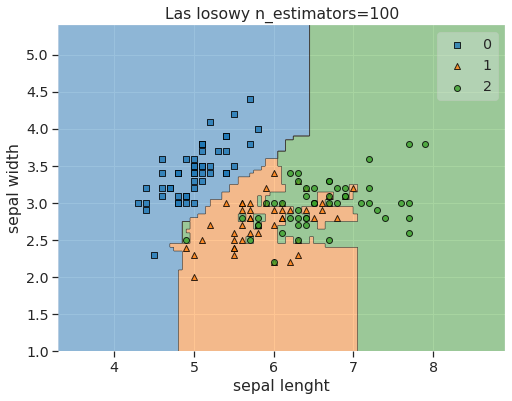

In [23]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(8, 6))
plot_decision_regions(data, target, classifier)
plt.xlabel('sepal lenght')
plt.ylabel('sepal width')
plt.title('Las losowy n_estimators=100')
plt.show()

### <a name='3'></a> Wszystkie cechy

In [24]:
data = all_data['data']
target = all_data['target']

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (112, 4)
X_test shape: (38, 4)
y_train shape: (112,)
y_test shape: (38,)


In [28]:
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [30]:
from sklearn.metrics import accuracy_score

y_pred = classifier.predict(X_test)

accuracy_score(y_test, y_pred)

1.0

In [31]:
classifier.feature_importances_

array([0.10968334, 0.02954459, 0.43763486, 0.42313721])

In [33]:
features = pd.DataFrame(data={'feature': feature_names, 'feature_importance': classifier.feature_importances_})
features

,feature,feature_importance
0,sepal length (cm),0.109683
1,sepal width (cm),0.029545
2,petal length (cm),0.437635
3,petal width (cm),0.423137


In [34]:
px.bar(features, x='feature', y='feature_importance', width=700, height=400)